In [5]:
import sys
sys.path.insert(0, "/home/pidoux/MASTER/ML/projet/Projet/Module")

from Loss import *
from Linear import *
from Activation import *
from mltools import *

import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm

100%|██████████| 1000/1000 [00:05<00:00, 193.27it/s]


accuracy :  0.996


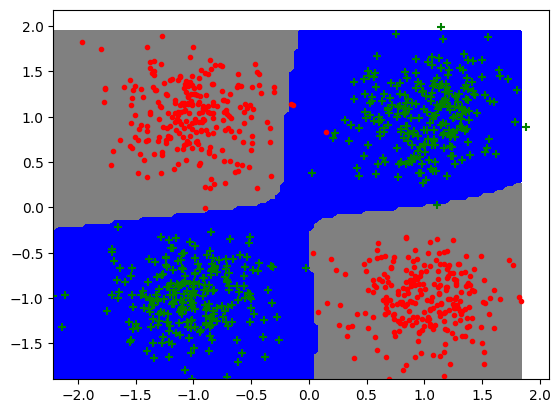

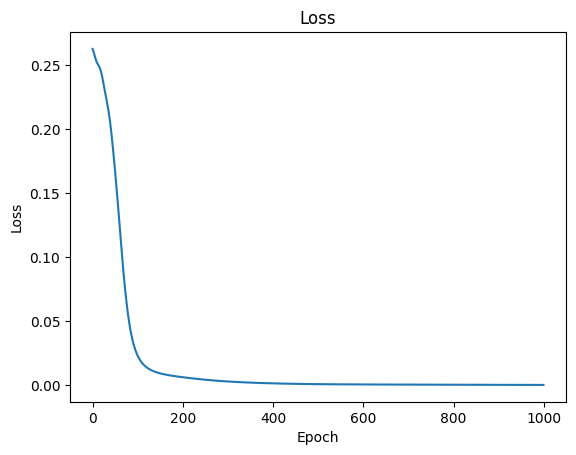

In [18]:
# générer les données
X_train, y_train = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=1000, data_type=1, epsilon=0.1)
X_test, y_test = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=1000, data_type=1, epsilon=0.1)
y_train = np.where(y_train==-1,0,1).reshape((-1,1))
y_test = np.where(y_test==-1,0,1).reshape((-1,1))

# paramétrer le modèle
d = X_train.shape[1]
d_prime = 14
out = 1
epoch = 1000
gradient_step = 1e-4

# initialiser les couches
loss_mse = MSELoss()
lin = Linear(d, d_prime)
lin2 = Linear(d_prime, out)
sig = Sigmoide()
tan = TanH()

# Apprentissage
losses = []
for i in tqdm(range(epoch)):
    
    #forward
    out_lin = lin.forward(X_train)    
    out_tan = tan.forward(out_lin)
    out_lin2 = lin2.forward(out_tan)
    out_sig = sig.forward(out_lin2)
    loss = loss_mse.forward(y_train,out_sig)
    losses.append(loss.mean())
    
    #backward
    loss_back = loss_mse.backward(y_train, out_sig)
    delta_sig = sig.backward_delta(out_lin2,loss_back)
    delta_lin2 = lin2.backward_delta(out_tan,delta_sig)
    delta_tan = tan.backward_delta(out_lin,delta_lin2)
    delta_lin = lin.backward_delta(X_train,delta_tan)
    
    #mise à jour des gradients
    lin2.backward_update_gradient(out_tan, delta_sig)
    lin.backward_update_gradient(X_train, delta_tan)    
    lin2.update_parameters(gradient_step = gradient_step)
    lin.update_parameters(gradient_step = gradient_step)
    lin.zero_grad()
    lin.zero_grad()

#prédiction
def predict(x):
    out_l = lin.forward(x)
    out_l = tan.forward(out_l)
    out_l = lin2.forward(out_l)
    out_l = sig.forward(out_l)  
    return np.where(out_l >= 0.5,1, 0)

print("accuracy : ",np.where(y_test == predict(X_test),1,0).mean())

plot_frontiere(X_test, predict, step=100)
plot_data(X_test, y_test.reshape(-1))
plt.show()
plt.close()

plt.figure()
plt.plot(np.arange(epoch),losses)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.close()
